In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 6

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
35/35 [==============================] - 0s 5ms/step - loss: 1.7000 - accuracy: 0.2442 - val_loss: 1.5656 - val_accuracy: 0.3265

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.5406 - accuracy: 0.3182 - val_loss: 1.4165 - val_accuracy: 0.5690

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.4171 - accuracy: 0.3829 - val_loss: 1.2898 - val_accuracy: 0.6352

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.3178 - accuracy: 0.4626 - val_loss: 1.1639 - val_accuracy: 0.7145

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.2390 - accuracy: 0.4891 - val_lo


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6702 - accuracy: 0.7319 - val_loss: 0.3652 - val_accuracy: 0.9228

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.7378 - val_loss: 0.3630 - val_accuracy: 0.9269

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.7426 - val_loss: 0.3568 - val_accuracy: 0.9235

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.7508 - val_loss: 0.3519 - val_accuracy: 0.9235

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
35/35 [==

35/35 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7916 - val_loss: 0.2899 - val_accuracy: 0.9283

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.7938 - val_loss: 0.2926 - val_accuracy: 0.9276

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7913 - val_loss: 0.3006 - val_accuracy: 0.9208

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.7861 - val_loss: 0.3020 - val_accuracy: 0.9228

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5584 - accuracy: 0.7925 - val_loss: 0.292


Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 111/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.8139 - val_loss: 0.2801 - val_accuracy: 0.9296

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.8118 - val_loss: 0.2678 - val_accuracy: 0.9358

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5257 - accuracy: 0.8091 - val_loss: 0.2756 - val_accuracy: 0.9344

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.8112 - val_loss: 0.2654 - val_accuracy: 0.9358

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
35/3

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 546us/step - loss: 0.2586 - accuracy: 0.9399


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.3057997e-02 8.8740475e-02 8.8813692e-01 3.5643723e-05 2.8849727e-05
 6.9499592e-08]
2


# Confusion matrix

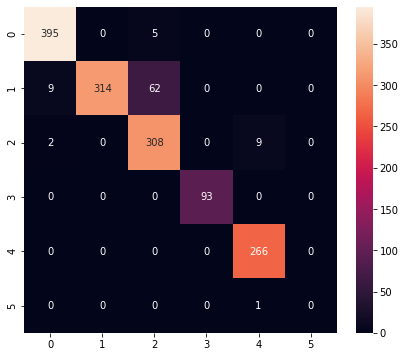

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       400
           1       1.00      0.82      0.90       385
           2       0.82      0.97      0.89       319
           3       1.00      1.00      1.00        93
           4       0.96      1.00      0.98       266
           5       0.00      0.00      0.00         1

    accuracy                           0.94      1464
   macro avg       0.79      0.79      0.79      1464
weighted avg       0.95      0.94      0.94      1464



C:\Users\offic\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\offic\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\offic\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmprn4kjmpq\assets


6448

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.3057979e-02 8.8740557e-02 8.8813686e-01 3.5643756e-05 2.8849754e-05
 6.9499592e-08]
2
